# CS-6580 Lecture 16 - More Plotting with Matplotlib and Seaborn
**Dylan Zwick**

*Weber State University*

Today, we'll touch on some of the other features and plots of Matplotlib that may be of use to you as you analyze data:

* Scatter plots
* Histograms
* 3D plots

We'll also discuss plot configuration and stylesheets, and the Seaborn library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

<ipython-input-1-9c6c14f46b8f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Scatter Plots

The scatter plot is a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

### Scatter Plots with plt.plot

In our last lecture we looked at using `plt.plot`/`ax.plot` to produce line plots. This same function can produce scatter plots as well:

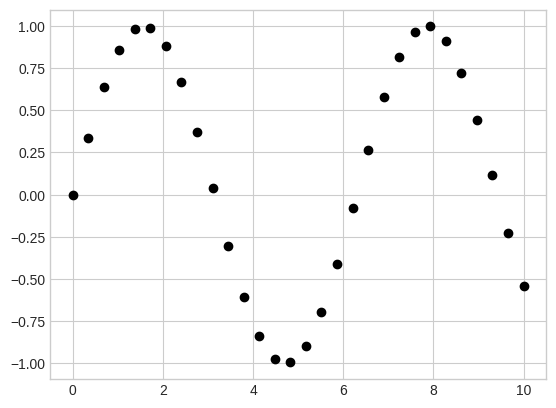

In [2]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. We've seen options like '-' and '--', but with 'o' it will create a scatter plot. (The full list of available symbols can be found in Matplotlib's [online documentation](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fmatplotlib.org%2Fstable%2Fapi%2F_as_gen%2Fmatplotlib.markers.MarkerStyle.html)). Most of the possibilities are fairly intuitive, and a number of the more common ones are demonstrated below:

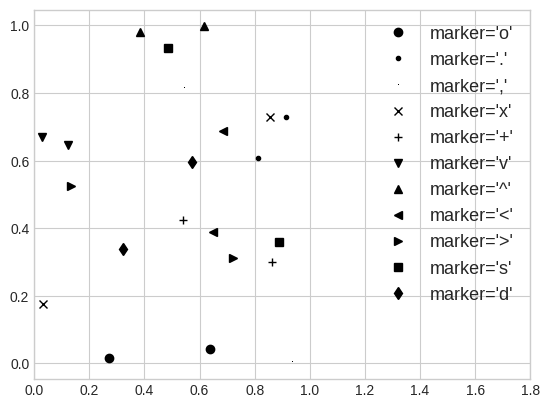

In [3]:
rng = np.random.default_rng(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(2), rng.random(2), marker, color='black',
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1, fontsize=13)
plt.xlim(0, 1.8);

It's also possible to combine scatter plots and line plots, as in the example below.

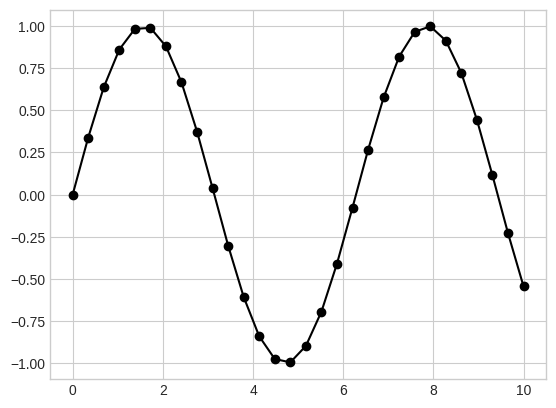

In [4]:
plt.plot(x, y, '-ok');

In fact, there are even more keyword arguments to `plt.plot` that specify a wide range of properties of the lines and markers:

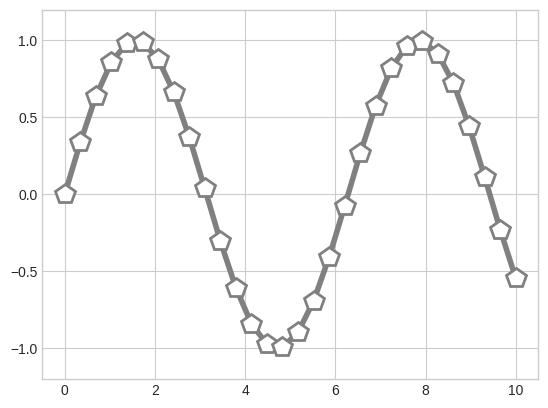

In [5]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

These kinds of options make `plt.plot` the primary workhorse for two-dimensional plots in Matplotlib.
For a full description of the options available, refer to the [`plt.plot` documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html).

### Scatter Plots with plt.scatter

A second, more powerful method of creating scatter plots is the `plt.scatter` function, which can be used very similarly to the `plt.plot` function:

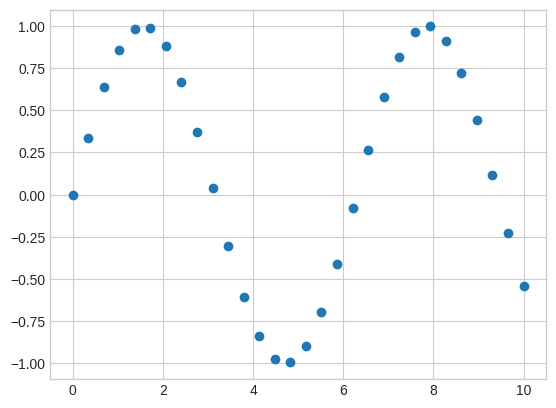

In [6]:
plt.scatter(x, y, marker='o');

The primary difference of `plt.scatter` from `plt.plot` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. This is a *big deal* for interactive data analysis.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we'll also use the `alpha` keyword to adjust the transparency level:

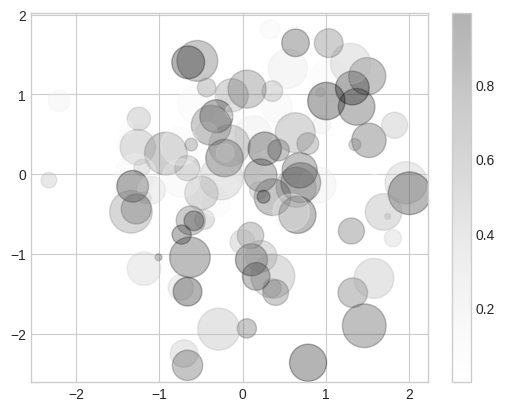

In [7]:
rng = np.random.default_rng(0)
x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3)
plt.colorbar();  #Stay tuned for more on colorbar

Notice that the color argument is automatically mapped to a color scale (shown here by the `colorbar` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris dataset from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

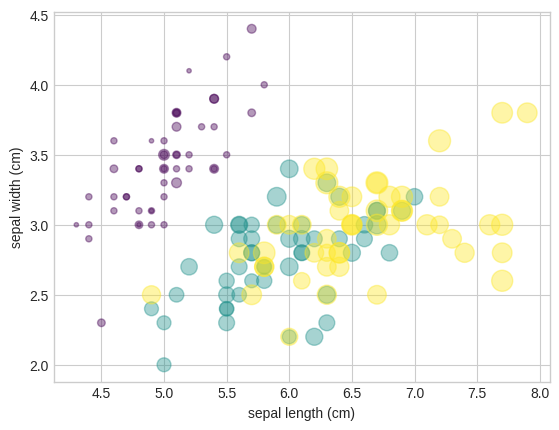

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.4,
            s=100*features[3], c=iris.target, cmap='viridis') #Stay tuned for more on cmap
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

We can see that this scatter plot has given us the ability to simultaneously explore four different dimensions of the data:
the (*x*, *y*) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

### plt.plot vs. plt.scatter

Aside from the different features available in plt.plot and plt.scatter, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, plt.plot can be noticeably more efficient than plt.scatter. The reason is that plt.scatter has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. With plt.plot, on the other hand, the markers for each point are guaranteed to be identical, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, this difference can lead to vastly different performance.

## Histograms

A simple histogram can be a great first step in understanding a dataset.

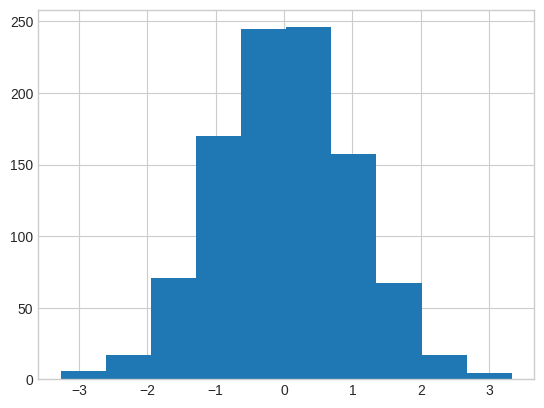

In [9]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)

plt.hist(data);

The `hist` function has many options to tune both the calculation and the display;
here's an example of a more customized histogram:

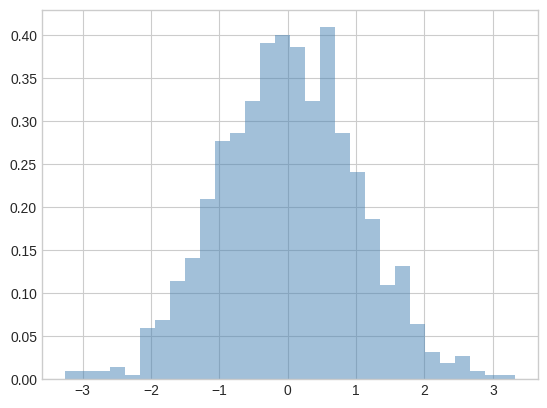

In [10]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='bar', color='steelblue', edgecolor='none');

The [online documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) has more information on other available customization options. Some transparency alpha, along with different colors, can be helpful when comparing histograms of several distributions:

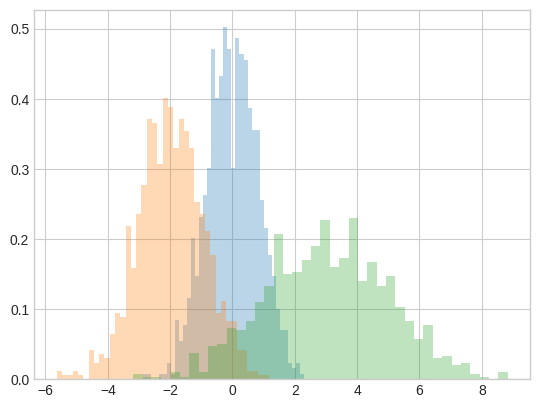

In [11]:
x1 = rng.normal(0, 0.8, 1000)
x2 = rng.normal(-2, 1, 1000)
x3 = rng.normal(3, 2, 1000)

kwargs = dict(histtype='bar', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you are interested in computing, but not displaying, the histogram (that is, counting the number of points in a given bin), you can use the `np.histogram` function:

In [12]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 23 241 491 224  21]


## Colorbars

For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool. In Matplotlib, a colorbar is drawn as a separate axes that can provide a key for the meaning of colors in a plot.

As we saw above, the simplest colorbar can be created with the `plt.colorbar` function:

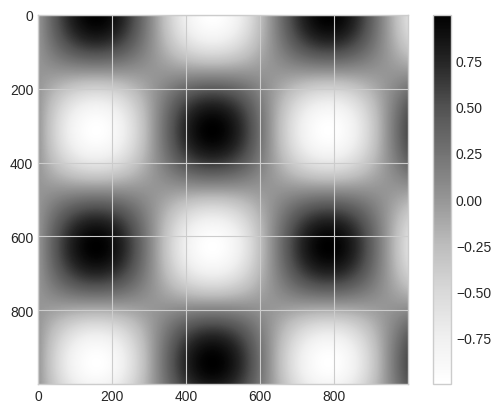

In [13]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

As you might imagine, these colorbars can be customized.

### Customizing Colorbars

The colormap can be specified using the `cmap` argument to the plotting function that is creating the visualization:

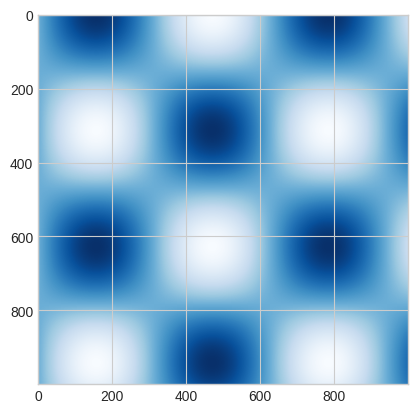

In [14]:
plt.imshow(I, cmap='Blues');

You can find more information about colormaps in the [online documentation](https://matplotlib.org/stable/users/explain/colors/colormaps.html).

A full treatment of color choice within visualizations is beyond the scope of this class, and given I'm colorblind a topic about which I'd be uniquely unqualified to provide insight, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833) by Nicholas Rougier, Michael Droettboom, and Philip Bourne.
Matplotlib's online documentation also has an [interesting discussion](https://matplotlib.org/stable/tutorials/colors/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., `binary` or `viridis`).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`).
- *Qualitative colormaps*: These mix colors with no particular sequence (e.g., `rainbow` or `jet`).

The `jet` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the `jet` colorbar into black and white:

In [15]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = mpl.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # Convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(
        cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = mpl.colormaps.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))

    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

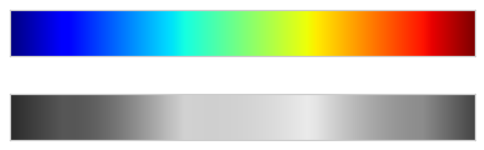

In [16]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as `viridis` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range; thus, it not only plays well with our color perception, but also will translate well to grayscale printing:

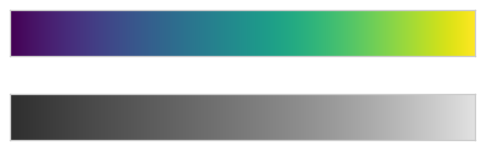

In [17]:
view_colormap('viridis')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as `RdBu` (*Red–Blue*) are helpful. However, as you can see in the following figure, it's important to note that the positive/negative information will be lost upon translation to grayscale!

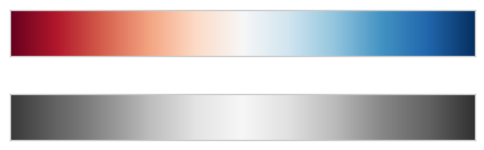

In [18]:
view_colormap('RdBu')

## Configuration and Stylesheets

While it's definitely possible to adjust the style of plot elements one by one, Matplotlib also offers mechanisms to adjust the overall style of a chart all at once. So, let's walk through some of Matplotlib's runtime configuration (*rc*) options, and take a look at the *stylesheets* feature, which contains some nice sets of default configurations.

### Plot Customization by Hand

Here is a fairly drab default histogram:

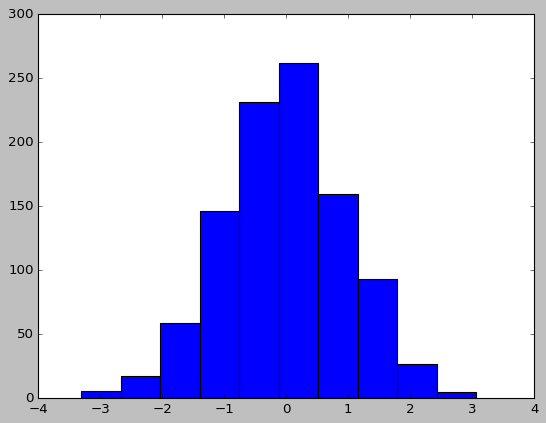

In [19]:
plt.style.use('classic')

x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to customize it and make it look more like what we want:

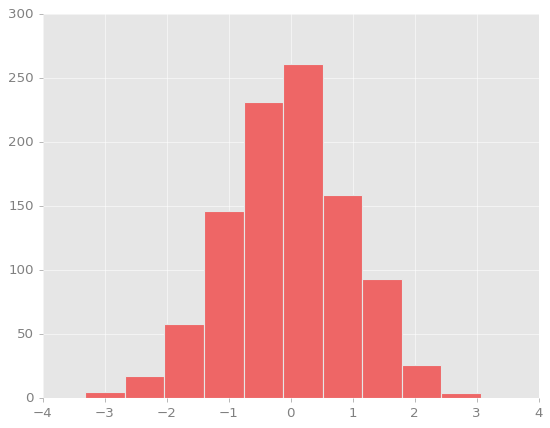

In [20]:
# use a gray background
fig = plt.figure(facecolor='white')
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white gridlines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)

# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, but it took a whole lot of effort! We definitely do not want to have to do all that tweaking each time we create a plot.

Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

### Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration containing the default styles for every plot element you create. This configuration can be adjusted at any time using the `plt.rc` convenience routine.

Let's see how we can modify the rc parameters so that our default plot will look similar to what we did above.

We can use the `plt.rc` function to change some of these settings:

In [21]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='white')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Let's see what simple line plots look like with these rc parameters:

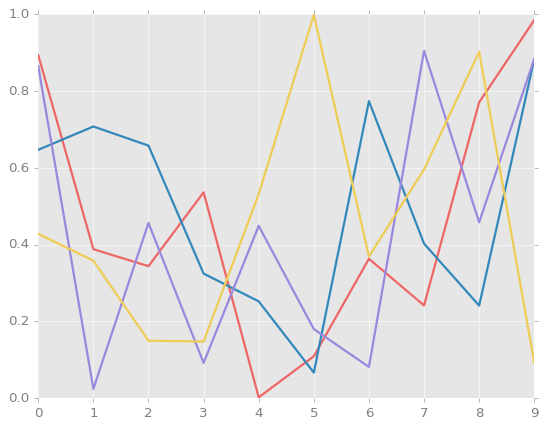

In [22]:
for i in range(4):
    plt.plot(np.random.rand(10))

Optionally, these settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

### Stylesheets

A newer mechanism for adjusting overall chart styles is via Matplotlib's `style` module, which includes a number of default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't go as far as creating your own style, you may find what you're looking for in the built-in stylesheets. You can find information about the options in the [onilne documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html), and `plt.style.available` contains a list of the available styles—here I'll list only the first five for brevity:

In [23]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

The standard way to switch to a stylesheet is to call `style.use`:

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the Python session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```

To demonstrate these styles, let's create a function that will make two basic types of plot:

In [24]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

#### Default Style

Matplotlib's `default` style was updated in the version 2.0 release; let's look at this first:

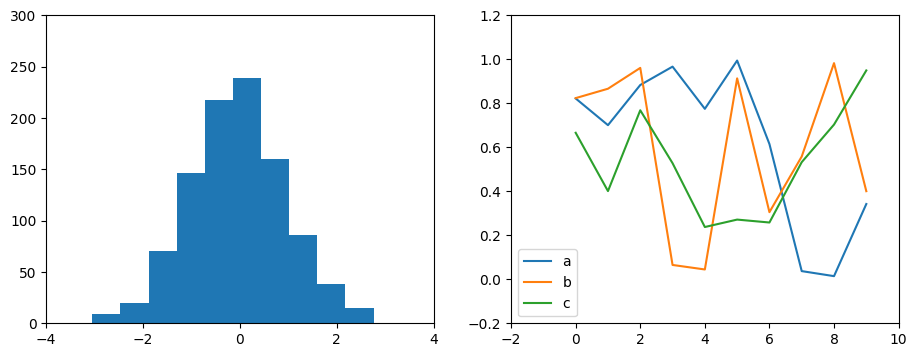

In [25]:
with plt.style.context('default'):
    hist_and_lines()

#### FiveThiryEight Style

The `fivethirtyeight` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see in the following figure, it is typified by bold colors, thick lines, and transparent axes:

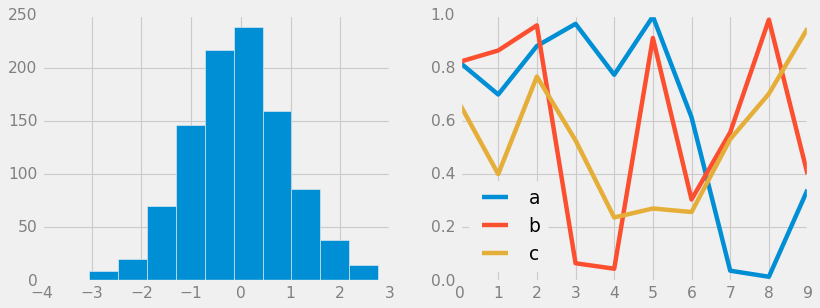

In [26]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

#### ggplot Style

The `ggplot` package in the R language is a popular visualization tool among data scientists. Matplotlib's `ggplot` style mimics the default styles from that package:

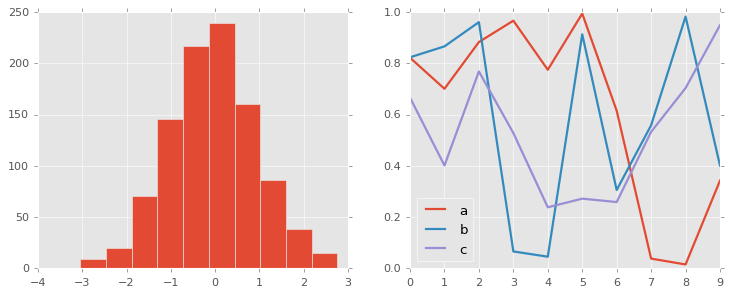

In [27]:
with plt.style.context('ggplot'):
    hist_and_lines()

#### Bayesian Methods for Hackers Style

There is a neat short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) by Cameron Davidson-Pilon that features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet:

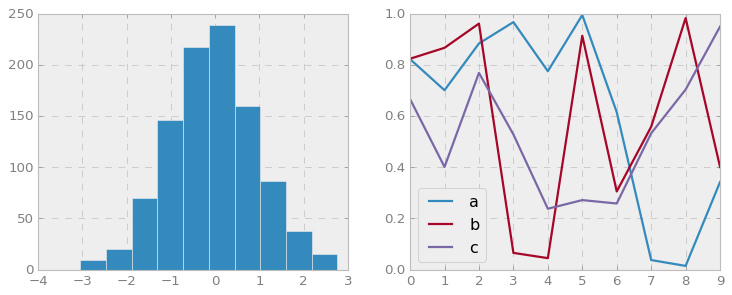

In [28]:
with plt.style.context('bmh'):
    hist_and_lines()

#### Dark Background Style

For figures used within presentations, it is often useful to have a dark rather than light background.
The `dark_background` style provides this:

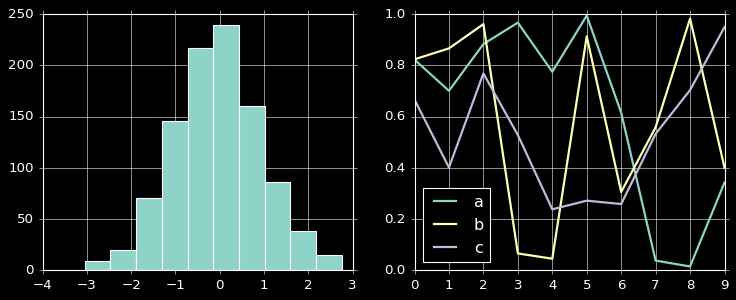

In [29]:
with plt.style.context('dark_background'):
    hist_and_lines()

#### Grayscale Style

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the `grayscale` style can be useful:

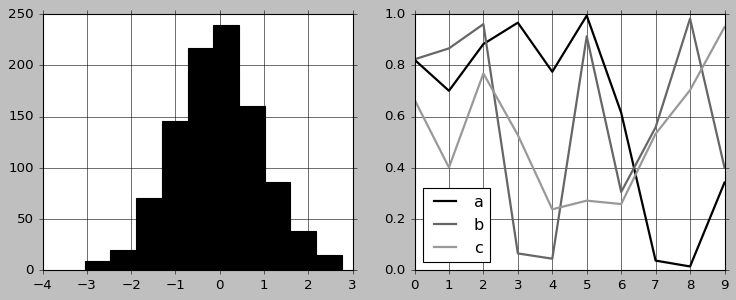

In [30]:
with plt.style.context('grayscale'):
    hist_and_lines()

#### Seaborn Style

Matplotlib also has several stylesheets inspired by the Seaborn library, which we'll be discussing next:

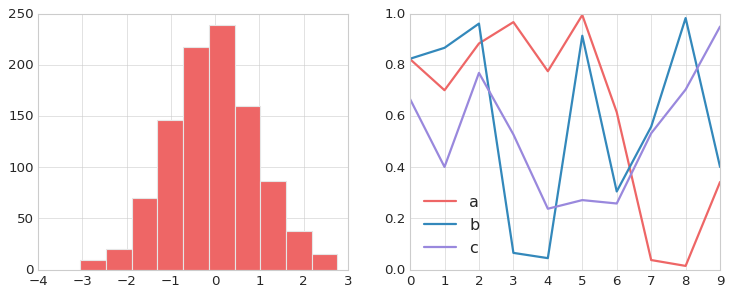

In [31]:
with plt.style.context('seaborn-whitegrid'):
    hist_and_lines()

## Seaborn

Matplotlib has been at the core of scientific visualization in Python for decades, but even avid users will admit it often leaves much to be desired.
There are several complaints about Matplotlib that often come up:

- A common early complaint, which is now outdated: prior to version 2.0, Matplotlib's color and style defaults were at times poor and looked dated.
- Matplotlib's API is relatively low-level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas `DataFrame` objects. In order to visualize data from a `DataFrame`, you must extract each `Series` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the `DataFrame` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas.

To be fair, the Matplotlib team has adapted to the changing landscape: it added the `plt.style` tools we just discussed, and Matplotlib is starting to handle Pandas data more seamlessly. But for all the reasons just discussed, Seaborn remains a useful add-on.

By convention, Seaborn is often imported as `sns`:

In [32]:
import seaborn as sns

### Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a variety of plot types useful for statistical data exploration, and even some statistical model fitting.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood), but the Seaborn API is much more convenient.

#### Histograms

We've seen histograms relatively straightforward in Matplotlib:

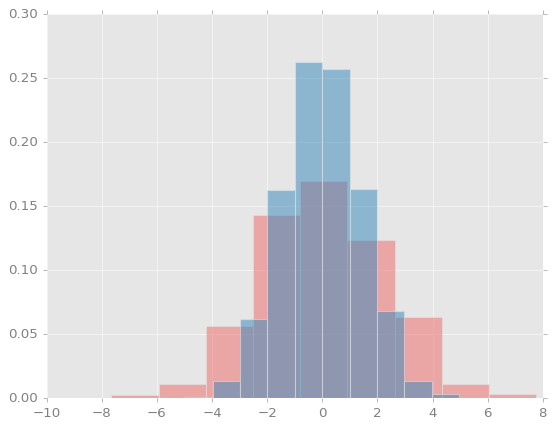

In [33]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

Rather than just providing a histogram as a visual output, we can get a smooth estimate of the distribution using kernel density estimation, which Seaborn does with ``sns.kdeplot``:

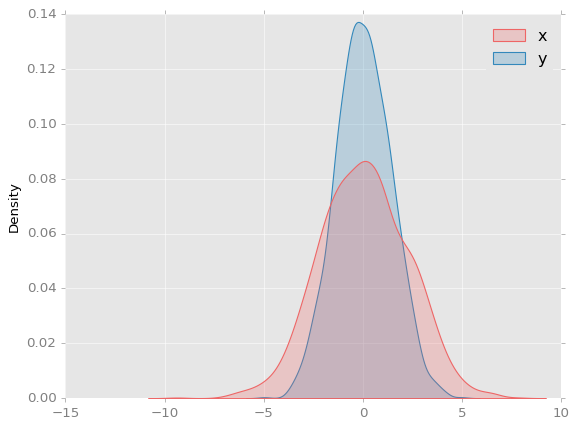

In [34]:
sns.kdeplot(data=data, fill=True);

#### Pair Plots

When you generalize joint plots to datasets of larger dimensions, you end up with *pair plots*. These are very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset we used above, which lists measurements of petals and sepals of three Iris species:

In [35]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot`` (see the following figure):

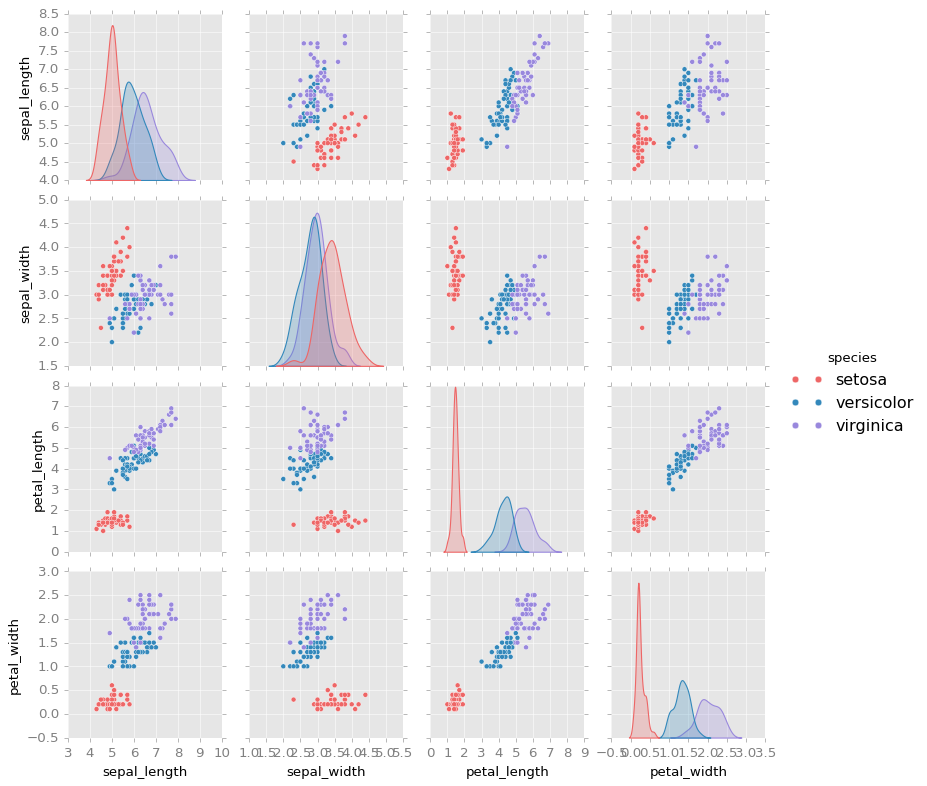

In [36]:
sns.pairplot(iris, hue='species', height=2.5);

#### Faceted Histograms

Sometimes the best way to view data is via histograms of subsets, as shown in the following figure. Seaborn's `FacetGrid` makes this simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [37]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


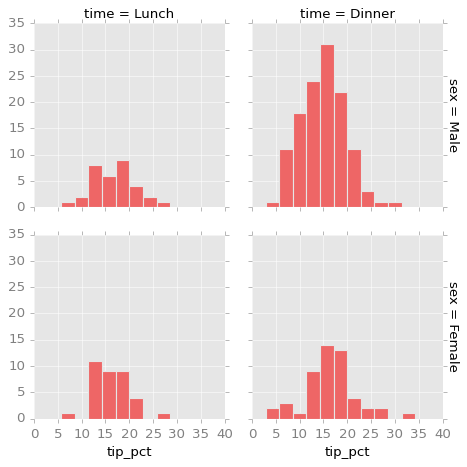

In [38]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

The faceted chart gives us some quick insights into the dataset: for example, we see that it contains far more data on male servers during the dinner hour than other categories, and typical tip amounts appear to range from approximately 10% to 20%, with some outliers on either end.

#### Categorical Plots

Categorical plots can be useful for this kind of visualization as well. These allow you to view the distribution of a parameter within bins defined by any other parameter, as shown in the following figure:

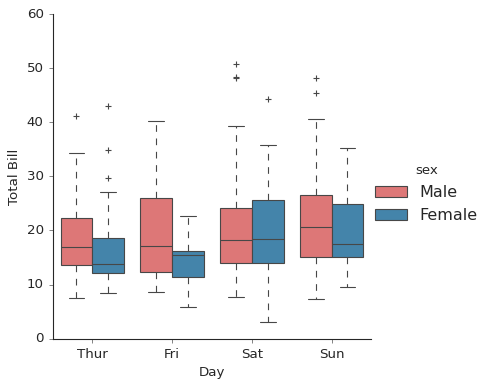

In [39]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

#### Joint Distributions

Similar to the pair plot we saw earlier, we can use `sns.jointplot` to show the joint distribution between different datasets, along with the associated marginal distributions:

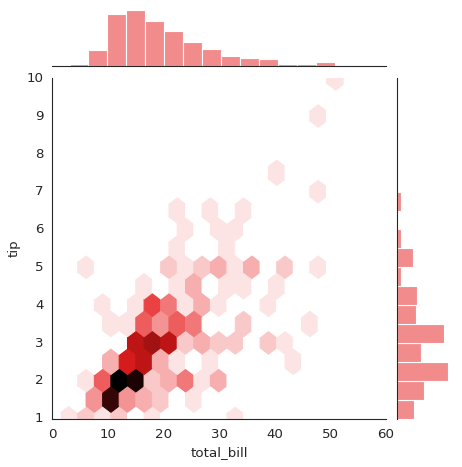

In [40]:
with sns.axes_style('white'):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind='hex')

The joint plot can even do some automatic kernel density estimation and regression:

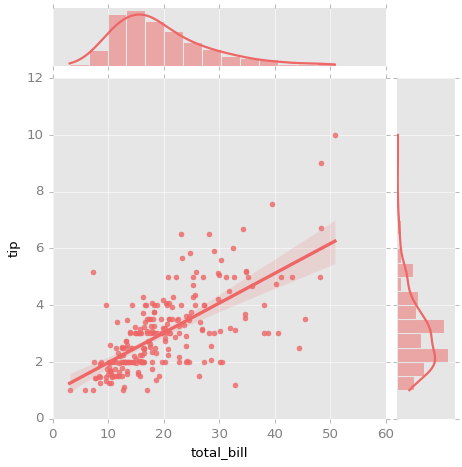

In [41]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind='reg');

#### Bar Plots

Time series can be plotted using `sns.factorplot`. In the following example, we'll use the Planets dataset available from Seaborn:

In [42]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


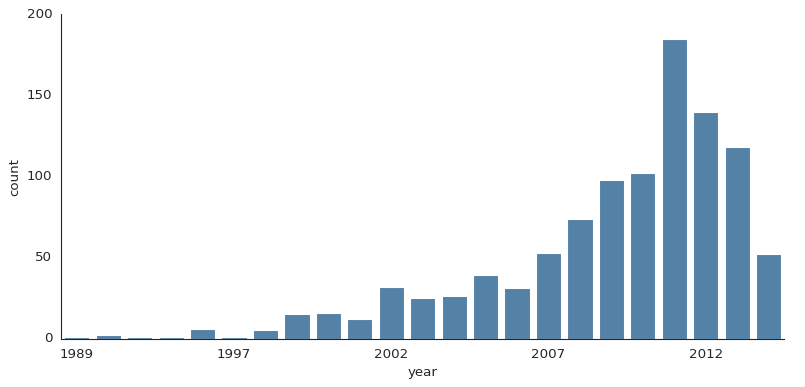

In [43]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

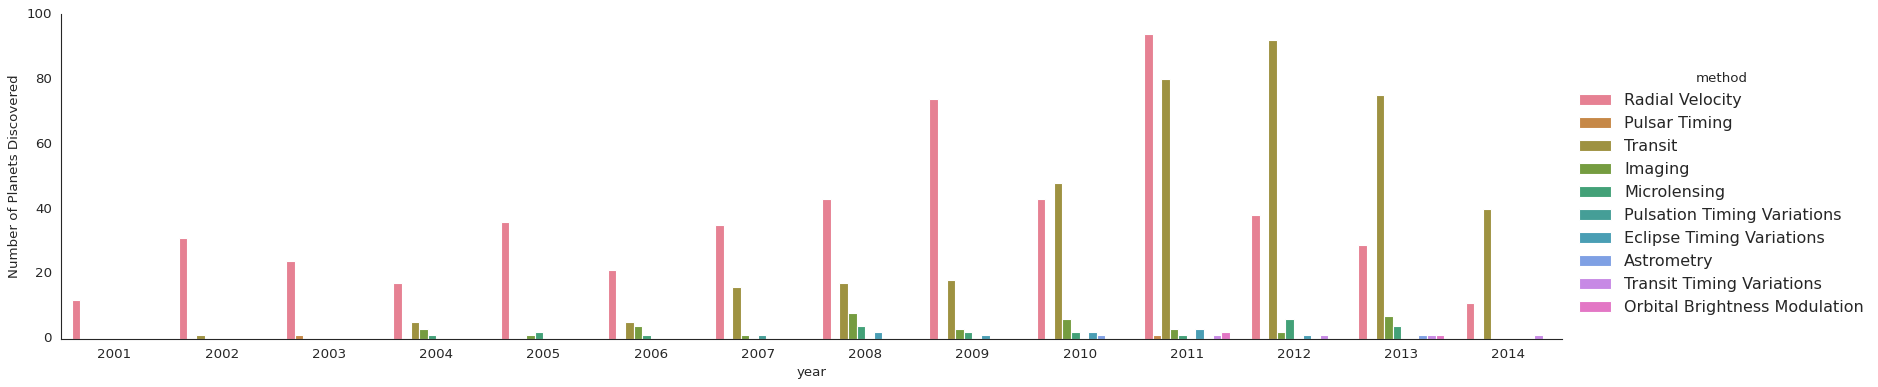

In [44]:
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind='count',
                    hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

As you might imagine, there's quite a bit more than can be done with Seaborn. For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), and particularly the [example gallery](https://seaborn.pydata.org/examples/index.html).